In [1]:
# TODO:
# (DONE) Clean up datatypes
# (DONE) Rename columns
# Fill in missing values

In [2]:
# Imports
import matplotlib
import pandas
import seaborn

In [3]:
# Read in data
properties = pandas.read_csv('data/properties_2016.csv',
                             dtype={'hashottuborspa' : str,
                                    'propertycountylandusecode' : str,
                                    'propertyzoningdesc' : str,
                                    'fireplaceflag' : str,
                                    'taxdelinquencyflag' : str})

### Check feature

In [4]:
feature_name = 'airconditioningtypeid'

In [5]:
# Summary statistics
properties[[feature_name]].describe()

,airconditioningtypeid
count,811519.000000
mean,1.931166
std,3.148587
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,13.000000


In [6]:
# Number of unique values
properties[feature_name].nunique()

7

In [7]:
# Unique values
sorted(properties[feature_name].unique())

[nan, 1.0, 3.0, 5.0, 9.0, 11.0, 12.0, 13.0]

In [8]:
# Percent null
properties[feature_name].isnull().sum()/properties.shape[0]

0.7281541006901676

### Investigate potential duplicate features

In [9]:
# finishedfloor1squarefeet: 2,782,500 null
# finishedsquarefeet50: 2,782,500 null
properties[properties['finishedfloor1squarefeet'].isnull()].shape

(2782500, 58)

In [10]:
# 2,782,500 null; 201,836 equal; 881 not equal
a = properties[['finishedfloor1squarefeet', 'finishedsquarefeet50']].copy()
a = a.dropna()
a = a[a['finishedfloor1squarefeet'] != a['finishedsquarefeet50']]
a.head()

,finishedfloor1squarefeet,finishedsquarefeet50
387,920.0,2177.0
552,3135.0,6390.0
1122,4063.0,8210.0
1161,410.0,1299.0
15143,1478.0,3107.0


In [11]:
# Drop? 
# properties = properties.drop('finishedfloor1squarefeet', axis=1)

In [12]:
# censustractandblock has more nulls than rawcensustractandblock.
col_1 = 'rawcensustractandblock'
col_2 = 'censustractandblock'
print([
    properties[properties[col_1].isnull()].shape[0],
    properties[properties[col_2].isnull()].shape[0]
])

[11437, 75126]


In [13]:
a = properties[[col_1, col_2]].copy()
a = a.dropna()
a = a[a[col_1] != a[col_2]]
a.head()

,rawcensustractandblock,censustractandblock
295,6.111001e+07,6.111001e+13
296,6.111001e+07,6.111001e+13
297,6.111001e+07,6.111001e+13
298,6.111001e+07,6.111001e+13
299,6.111001e+07,6.111001e+13


In [14]:
print([a.iloc[0][1], a.iloc[0][0]])

[61110010011023.0, 61110010.011023]


### Set up

In [15]:
properties = properties.rename(columns={
    # Identification-related
    'parcelid' : 'parcel_id',                           # 2,985,217 nunique
    'airconditioningtypeid' : 'ac_id',                  # [nan, 1, 3, 5, 9, 11, 12, 13]
    'architecturalstyletypeid' : 'arch_id',             # [nan, 2, 3, 5, 7, 8, 10, 21, 27]
    'buildingclasstypeid' : 'framing_id',               # [nan, 1, 2, 3, 4, 5]
    'buildingqualitytypeid' : 'quality_id',             # 12 nunique
    'heatingorsystemtypeid' : 'heating_id',             # 14 nunique
    'propertycountylandusecode' : 'county_zoning_id',   # 240 nunique
    'propertylandusetypeid' : 'zoning_id',              # 15 nunique
    'regionidcity' : 'city_id',                         # 186 nunique
    'regionidcounty' : 'county_id',                     # [nan, 1286, 2061, 3101]
    'regionidneighborhood' : 'neighborhood_id',         # 528 nunique
    'regionidzip' : 'zipcode_id',                       # 405 nunique
    'typeconstructiontypeid' : 'material_id',           # [nan, 4, 6, 10, 11, 13]
    'fips' : 'fips',                                    # [nan, 6037, 6059, 6111]
    'propertyzoningdesc' : 'zoning_desc_id',            # 5,638 nunique
    'rawcensustractandblock' : 'raw_census_id',         # 99,393 nunique. Might be a duplicate
    'censustractandblock' : 'census_id',                # 96,771 nunique. Might be a duplicate
    
    # Count-related
    'bathroomcnt' : 'num_bath',
    'bedroomcnt' : 'num_bed',
    'calculatedbathnbr': 'num_calc_bath',
    'fireplacecnt' : 'num_fireplace',
    'fullbathcnt' : 'num_full_bath',
    'garagecarcnt' : 'num_garage',
    'poolcnt' : 'num_pool',
    'roomcnt' : 'num_room',
    'threequarterbathnbr': 'num_34_bath',
    'unitcnt' : 'num_unit',
    'numberofstories' : 'num_story',
    
    # Size-related
    'basementsqft' : 'size_basement',
    'calculatedfinishedsquarefeet' : 'size_fin_total',
    'finishedsquarefeet12' : 'size_fin_living',
    'finishedsquarefeet13' : 'size_perim_living',
    'finishedsquarefeet15' : 'size_total',
    'finishedsquarefeet50' : 'size_fin_first_1',       # Might be a duplicate
    'finishedfloor1squarefeet' : 'size_fin_first_2',   # Might be a duplicate
    'finishedsquarefeet6' : 'size_base',
    'garagetotalsqft' : 'size_garage',
    'lotsizesquarefeet' : 'size_lot',
    'yardbuildingsqft17' : 'size_patio',
    'yardbuildingsqft26' : 'size_storage',
    'poolsizesum' : 'size_pool',
    
    # Tax-related
    'taxvaluedollarcnt' : 'tax_value_total',    
    'structuretaxvaluedollarcnt' : 'tax_value_building',
    'landtaxvaluedollarcnt' : 'tax_value_land',    
    'assessmentyear' : 'tax_year',
    'taxamount' : 'tax_amount',
    'taxdelinquencyyear' : 'tax_delinq_year',    
    
    # Categorical
    'fireplaceflag' : 'flag_fireplace',         # [nan, True]
    'taxdelinquencyflag' : 'flag_tax_delinq',   # ['Y', 'nan']
    'hashottuborspa' : 'flag_tub',              # [nan, True]
    'pooltypeid10' : 'flag_pool_1',             # [nan, 1]
    'pooltypeid2' : 'flag_pool_2',              # [nan, 1]
    'pooltypeid7' : 'flag_pool_3',              # [nan, 1]    
    'storytypeid' : 'flag_basement',            # [nan, 7]
    'decktypeid' : 'flag_deck',                 # [nan, 66]
    
    # General / Other
    'latitude' : 'latitude',
    'longitude' : 'longitude',    
    'yearbuilt' : 'year_built',
})

### Plot

In [16]:
null_percentage = properties.isnull().sum()
null_percentage = null_percentage/properties.shape[0]
null_percentage = null_percentage.sort_values()

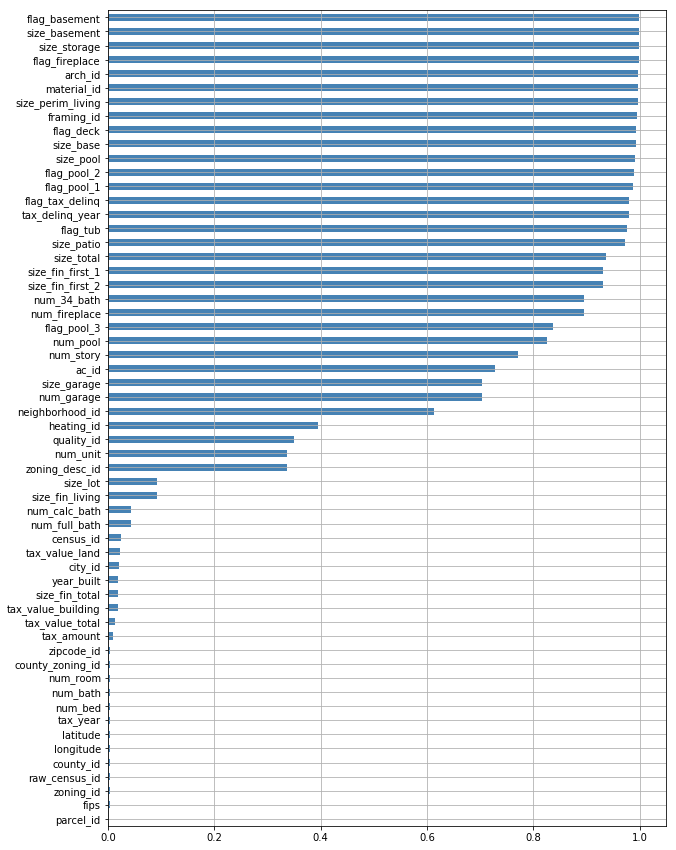

In [17]:
null_percentage.plot(kind='barh', figsize=(10,15), grid=True, color='steelblue')
matplotlib.pyplot.show()

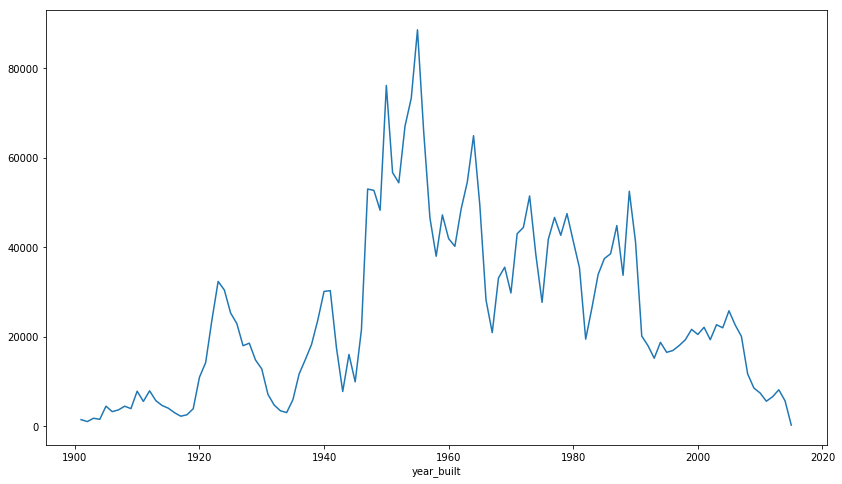

In [18]:
year_built_counts = properties.groupby('year_built').count()['parcel_id']
year_built_counts = year_built_counts.rename('count').sort_index()
year_built_counts = year_built_counts[year_built_counts.index > 1900]   # Very few datapoints before 1900
year_built_counts.plot(figsize=(14,8))
matplotlib.pyplot.show()

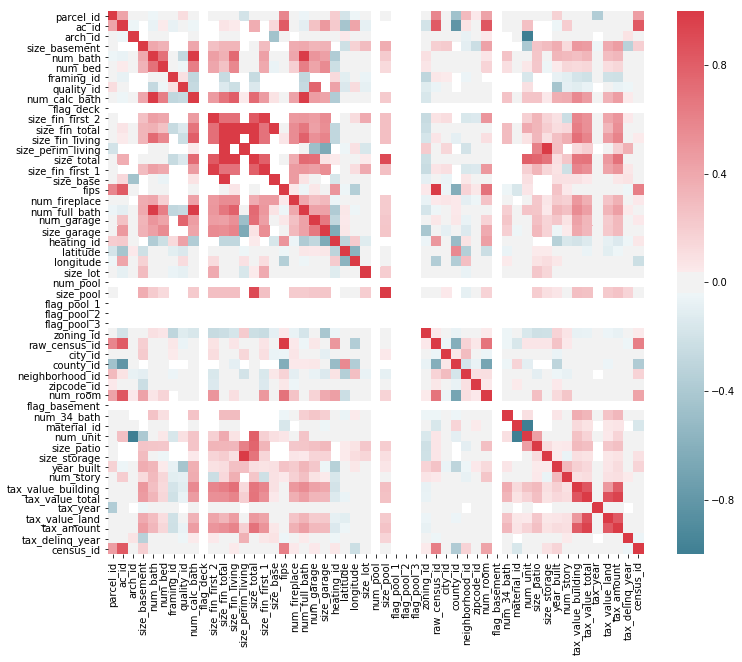

In [19]:
# size features are all highly correlated.
# tax value features are highly correlated.
corr = properties.corr()
matplotlib.pyplot.figure(figsize=(12,10))
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
seaborn.heatmap(corr, cmap=cmap)
matplotlib.pyplot.show()

In [20]:
# TODO: anything surprising here?
high_corr = corr.unstack()
high_corr = high_corr[high_corr.abs() > 0.75].reset_index()
high_corr.columns = ['feature_1', 'feature_2', 'corr']
high_corr = high_corr[high_corr['feature_1'] != high_corr['feature_2']]
high_corr = high_corr.reset_index(drop=True)
high_corr.sample(5)

,feature_1,feature_2,corr
44,num_room,ac_id,0.840846
35,fips,raw_census_id,0.999940
7,num_bath,num_full_bath,0.987360
27,size_total,size_fin_first_1,0.789067
49,size_patio,size_total,0.763827
